In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/drive/MyDrive/BAILAM/FOOD/DATA/TRAIN'
val_dir = '/content/drive/MyDrive/BAILAM/FOOD/DATA/VALID'

img_size = (128,128)
batch_size = 128

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/225,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size = batch_size,
    class_mode='categorical',
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size = batch_size,
    class_mode='categorical',
)

Found 3525 images belonging to 5 classes.
Found 1175 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,103,685 (49.99 MB)

 Trainable params: 13,103,685 (49.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 1
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1246s 44s/step - accuracy: 0.2313 - loss: 1.6828 - val_accuracy: 0.3898 - val_loss: 1.2381


In [ ]:
epochs = 100
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3928 - loss: 1.3175 - val_accuracy: 0.5634 - val_loss: 1.1120
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4666 - loss: 1.2077 - val_accuracy: 0.5634 - val_loss: 0.9593
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5304 - loss: 1.0915 - val_accuracy: 0.6570 - val_loss: 0.9200
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5971 - loss: 1.0095 - val_accuracy: 0.6911 - val_loss: 0.7922
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6434 - loss: 0.9545 - val_accuracy: 0.7634 - val_loss: 0.7180
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6788 - loss: 0.8743 - val_accuracy: 0.7668 - val_loss: 0.6678
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6924 - loss: 0.8355 - val_accuracy: 0.7694 - val_loss: 0.6492
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6886 - loss: 0.8397 - val_accuracy: 0.7549 - v

In [ ]:
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm tra')
plt.xlabel('Số lần học (Epochs)')
plt.ylabel('Độ chính xác')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
model.save('/content/drive/MyDrive/BAILAM/FOOD/model_food.h5')

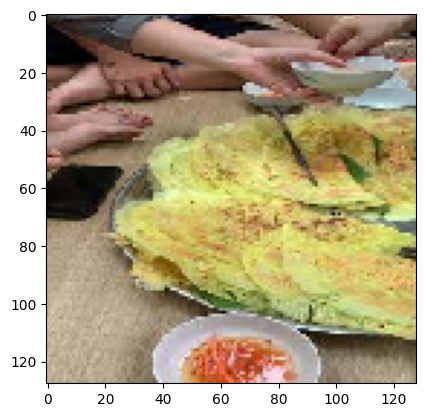

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Nhan dien la: BANH_XEO


In [ ]:
from tensorflow.keras.models import load_model
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/BAILAM/FOOD/model_food.h5'
model = load_model(model_path)

path = "/content/xeo.jpg"
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = img_to_array(img)
img_array = img_array.reshape(1, 128, 128, 3)
img_array = img_array / 255.0
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
food_name = class_labels[prediction]
print(f"Nhan dien la: {food_name}")